In [5]:
%run algorithm.ipynb

import matplotlib.pyplot as plt
from datetime import timedelta
import time

In [8]:
def test_graph(num_of_nodes=10, edge_existence_prob=0.3,
               num_ants = 40, num_iters = 30, alpha = 1, beta = 2, evaporation_rate = 0.5, pheromone_initial=1.0):

    G = nx.erdos_renyi_graph(num_of_nodes, edge_existence_prob)
    while not nx.is_connected(G):
        G = nx.erdos_renyi_graph(num_of_nodes, edge_existence_prob)
    nx.set_edge_attributes(G, pheromone_initial, 'pheromone')
    print(f"\n\nTesting a graph of {num_of_nodes} nodes and {len(G.edges)} edges...\n")

    mst = nx.minimum_spanning_tree(G)
    print(f'mst: {evaluate(mst)}')
    
    start_time = time.time()
    tree = aco(G, num_ants, num_iters, alpha, beta, evaporation_rate)
    end_time = time.time()
    print(f"Execution time: {timedelta(seconds=end_time-start_time)}")
    print(f'mlst: {evaluate(tree)}')
    
    node_colors = []
    for node in tree.nodes():
        if tree.degree[node] == 1:
            node_colors.append('red')
        else:
            node_colors.append('blue')
    
    _, axes = plt.subplots(1, 2, figsize=(10, 5))

    nx.draw(G, node_size=10000/num_of_nodes, ax=axes[0])
    axes[0].set_title("Original graph")

    nx.draw(tree, node_color=node_colors, node_size=10000/num_of_nodes, ax=axes[1])
    axes[1].set_title("Maximum Leaf Spanning Tree")

    plt.tight_layout()
    plt.show()




Testing a graph of 50 nodes and 239 edges...

mst: 37
Execution time: 0:00:58.990604
mlst: 40


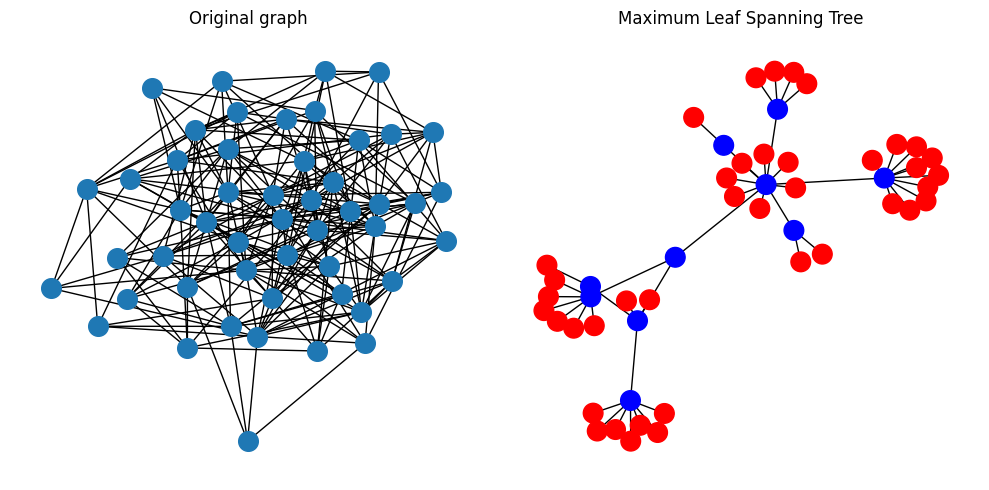

In [10]:
test_graph(num_of_nodes=50, edge_existence_prob=0.2, num_ants = 40, num_iters = 200)